In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')
import operator
import collections
from sklearn.preprocessing import Imputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\munth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\munth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
tweets = pd.read_csv(r"C:\Users\munth\Desktop\Uni\Machine Learning\Project\data\merged2.csv", encoding="utf8")

In [3]:
tweets.head()

,text,Hour,Week_Day,Month_Day,Is_Trump
0,âThe Chinese say (about Trumpâs Trade War ...,14.0,1.0,11.0,1
1,Shifty Adam Schiff will only release doctored ...,14.0,1.0,11.0,1
2,The lawyer for the Whistleblower takes away al...,14.0,1.0,11.0,1
3,So with one Rally by me at the end of the camp...,14.0,1.0,11.0,1
4,Will be meeting with representatives of the Va...,14.0,1.0,11.0,1


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94998 entries, 0 to 94997
Data columns (total 5 columns):
text         94998 non-null object
Hour         93319 non-null float64
Week_Day     93319 non-null float64
Month_Day    93319 non-null float64
Is_Trump     94998 non-null int64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.6+ MB


In [5]:
tweets['Week_Day'].describe()

count    93319.000000
mean         3.959976
std          1.823726
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Week_Day, dtype: float64

In [6]:
tweets['Month_Day'].describe()

count    93319.000000
mean        21.664816
std          8.611015
min          1.000000
25%         18.000000
50%         25.000000
75%         28.000000
max         31.000000
Name: Month_Day, dtype: float64

In [8]:
tweets['Hour'].describe()

count    93319.000000
mean        13.089800
std          6.917014
min          0.000000
25%          7.000000
50%         14.000000
75%         19.000000
max         23.000000
Name: Hour, dtype: float64

In [9]:
tweets.isnull().sum()

text            0
Hour         1679
Week_Day     1679
Month_Day    1679
Is_Trump        0
dtype: int64

In [10]:
imp=Imputer(strategy="most_frequent" )
tweets["Month_Day"]=imp.fit_transform(tweets[["Month_Day"]]).ravel()
tweets["Week_Day"]=imp.fit_transform(tweets[["Week_Day"]]).ravel()
tweets["Hour"]=imp.fit_transform(tweets[["Hour"]]).ravel()

In [11]:
tweets.isnull().sum()

text         0
Hour         0
Week_Day     0
Month_Day    0
Is_Trump     0
dtype: int64

In [13]:
tweets['Hour'] = tweets['Hour'].astype(int) #before converting the type, must fill null values in data
tweets['Month_Day'] = tweets['Month_Day'].astype(int)
tweets['Week_Day'] = tweets['Week_Day'].astype(int)
#tweets['Is_Trump'] = tweets['Is_Trump'].astype(bool)
#certain functions used throught this notebook do not parse boolean values, so i had to keep the "Is_Trump" type as integer

In [14]:
tweets.info() #check changed type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94998 entries, 0 to 94997
Data columns (total 5 columns):
text         94998 non-null object
Hour         94998 non-null int32
Week_Day     94998 non-null int32
Month_Day    94998 non-null int32
Is_Trump     94998 non-null int64
dtypes: int32(3), int64(1), object(1)
memory usage: 2.5+ MB


In [15]:
tweets.head()

,text,Hour,Week_Day,Month_Day,Is_Trump
0,âThe Chinese say (about Trumpâs Trade War ...,14,1,11,1
1,Shifty Adam Schiff will only release doctored ...,14,1,11,1
2,The lawyer for the Whistleblower takes away al...,14,1,11,1
3,So with one Rally by me at the end of the camp...,14,1,11,1
4,Will be meeting with representatives of the Va...,14,1,11,1


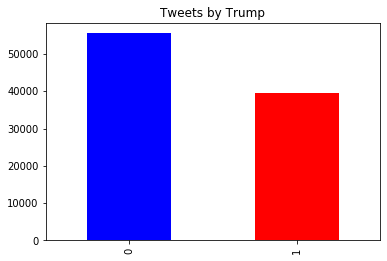

In [16]:
count_Class=pd.value_counts(tweets["Is_Trump"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "red"])
plt.title('Tweets by Trump')
plt.show()

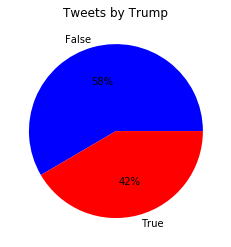

In [17]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%', colors= ["blue", "red"])
plt.title('Tweets by Trump')
plt.ylabel('')
plt.show()

In [17]:
tweets.corr(method ='pearson') 
#the date in the random users tweets dataset were all taken between the 20th till the 10th of each month
#that explains the high correlation, the Hour and Month_Day did not correlate as expected

,Hour,Week_Day,Month_Day,Is_Trump
Hour,1.000000,0.037863,-0.135018,0.016492
Week_Day,0.037863,1.000000,-0.004835,-0.154581
Month_Day,-0.135018,-0.004835,1.000000,-0.543999
Is_Trump,0.016492,-0.154581,-0.543999,1.000000


In [19]:
count1 = Counter(" ".join(tweets[tweets['Is_Trump']==0]["text"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words not by Trump", 1 : "count"})
count2 = Counter(" ".join(tweets[tweets['Is_Trump']==1]["text"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words by Trump", 1 : "count_"})

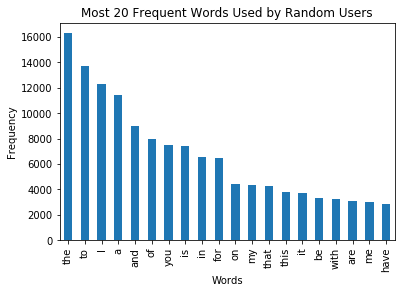

In [20]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words not by Trump"]))
plt.xticks(y_pos, df1["words not by Trump"])
plt.title('Most 20 Frequent Words Used by Random Users')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

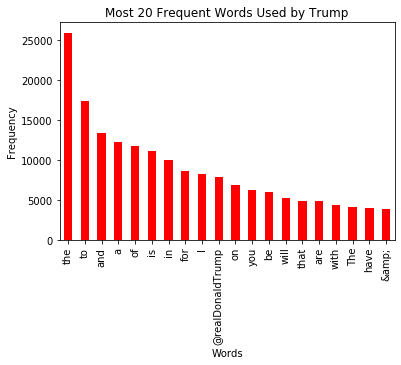

In [21]:
df2.plot.bar(legend = False, color = 'red')
y_pos = np.arange(len(df2["words by Trump"]))
plt.xticks(y_pos, df2["words by Trump"])
plt.title('Most 20 Frequent Words Used by Trump')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [35]:
train, test = model_selection.train_test_split(tweets, random_state=42) #create test data

In [19]:
def preprocessing(tweet):
    tweet = tweet.lower() # make all text lowercase
    tweet = re.sub(r'[^A-Za-z\s]+', '', tweet) #remove non alphanumeric characters
    stop_words = set(stopwords.words('english')) #get stopwords
    #ps = PorterStemmer() #stemming, all words alike will become the same word
    tweet = nltk.word_tokenize(tweet) # break tweets into individual words
    filtered_tweet = [w for w in tweet if not w in stop_words]
    for word in filtered_tweet:
        dic[word] = dic.get(word,0)+1 #count ++ for repeated words
    X.append(filtered_tweet)
    

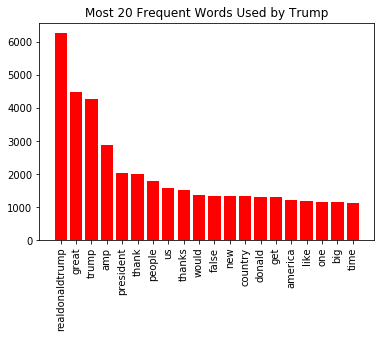

In [20]:
#get dictionary for most frquent words by trump
X = [] #contains our filtered tweets
dic={}
for row in range(len(train)):
    if train.iloc[row,4]==1:
        preprocessing(train.iloc[row,0])
new_dic={}
new_dic= [(k, dic[k]) for k in sorted(dic, key=dic.get, reverse=True)]
new_dic=dict(new_dic) #convert list to dic (the sorting returns a list of tuples)
words = list(new_dic.keys())
count = list(new_dic.values())
for i in range(0,20):
    plt.bar(i,count[i],tick_label=words[i],color='red')
plt.xticks(range(0,20),words,rotation=90)
plt.title('Most 20 Frequent Words Used by Trump')
plt.show()

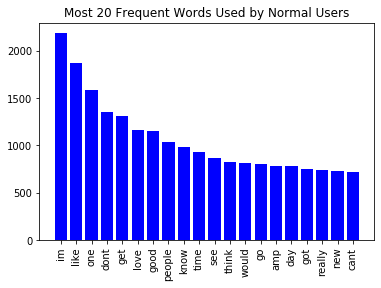

In [136]:
#get dictionary for most frquent words by users
X = [] #contains our filtered tweets
dic={}
for row in range(len(train)):
    if train.iloc[row,4]==0:
        preprocessing(train.iloc[row,0])
new_dic={}
new_dic= [(k, dic[k]) for k in sorted(dic, key=dic.get, reverse=True)]
new_dic=dict(new_dic) #convert list to dic (the sorting returns a list of tuples)
words = list(new_dic.keys())
count = list(new_dic.values())
for i in range(0,20):
    plt.bar(i,count[i],tick_label=words[i],color='blue')
plt.xticks(range(0,20),words,rotation=90)
plt.title('Most 20 Frequent Words Used by Normal Users')
plt.show()

In [36]:
#get the dictionary for the entire training set
X = [] #contains our filtered tweets
dic={}
for row in range(len(train)):
    preprocessing(train.iloc[row,0])

In [37]:
len(train['text'])

71248

In [39]:
train['text']=X

In [40]:
new_dic={}
new_dic= [(k, dic[k]) for k in sorted(dic, key=dic.get, reverse=True)]
for k,v in new_dic[:10]: #print first 20 frequent words
    print (k,v)

realdonaldtrump 6271
great 5123
trump 4744
amp 3679
like 3057
people 2826
one 2734
im 2682
thank 2663
get 2623


In [41]:
sum=0
for i in dic.keys():
    sum+=1
print(sum)
#the dictionary has a total of 63070 distinctive words

63070


In [42]:
#remove "realdonaldtrump" from dic
dic.pop('realdonaldtrump')

6271

In [43]:
sum=0
for i in dic.keys():
    sum+=1
print(sum)

63069


In [44]:
new_dic={}
new_dic= [(k, dic[k]) for k in sorted(dic, key=dic.get, reverse=True)]
for k,v in new_dic[:10]: #print first 20 frequent words
    print (k,v)

great 5123
trump 4744
amp 3679
like 3057
people 2826
one 2734
im 2682
thank 2663
get 2623
dont 2406


In [45]:
type(new_dic)

list

In [46]:
new_dic=dict(new_dic) #convert list to dic (the sorting returns a list of tuples)

In [47]:
type(new_dic)

dict

In [49]:
for i in X [:5]: #print first 5 rows after editing
    print (i)

['fuck', 'bitch', 'l']
['clinton', 'campaign', 'harry', 'reid', 'worked', 'new', 'york', 'times', 'smear', 'state', 'dept', 'watchdogtime', 'draintheswamp', 'httpstcovddgdpctg']
['years', 'ago', 'today', 'pan', 'flight', 'downed', 'terrorist', 'killing', 'innocent', 'people', 'alexsalmond', 'released', 'terrorist']
['im', 'honestly', 'terrified']
['lukatew']


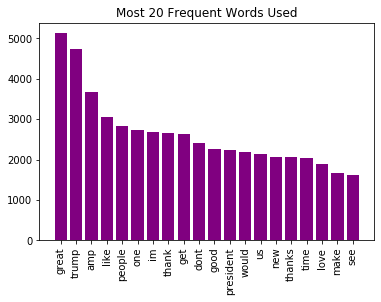

In [50]:
words = list(new_dic.keys())
count = list(new_dic.values())
for i in range(0,20):
    plt.bar(i,count[i],tick_label=words[i],color='purple')
plt.xticks(range(0,20),words,rotation=90)
plt.title('Most 20 Frequent Words Used')
plt.show()

In [51]:
train.head()

,text,Hour,Week_Day,Month_Day,Is_Trump
57350,"[fuck, bitch, l]",23,3,22,0
9918,"[clinton, campaign, harry, reid, worked, new, ...",22,5,21,1
26919,"[years, ago, today, pan, flight, downed, terro...",0,7,22,1
92742,"[im, honestly, terrified]",3,4,30,0
49312,[lukatew],19,6,1,0


In [52]:
#did not use max_features attribute 
f = feature_extraction.text.CountVectorizer(stop_words = 'english')  
X = f.fit_transform(tweets["text"])
np.shape(X) #added 76967 new features

(94998, 76967)

In [53]:
y = tweets.iloc[:, 4].values

In [54]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state=42) 
print([np.shape(X_train), np.shape(X_test)])
#splitting the dataset again to create a sparse matrix of features 

[(71248, 76967), (23750, 76967)]


In [55]:
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
temp=X.toarray()

In [13]:
#train using random forest
forest = RandomForestClassifier(n_estimators = 501, criterion = 'entropy')                               
forest.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
# Predicting the Test set results 

y_pred = forest.predict(X_test) 
y_pred 

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.929263
Precision: 0.975189
Recall: 0.850899
F1 score: 0.908815


In [16]:
# Making the Confusion Matrix 
matrix = confusion_matrix(y_test, y_pred) 
  
pd.DataFrame(data = matrix, columns = ['Predicted User', 'Predicted Trump'],index = ['Actual User', 'Actual Trump'])

,Predicted User,Predicted Trump
Actual User,13698,213
Actual Trump,1467,8372


Text(0.5, 0, 'False Positive Rate')

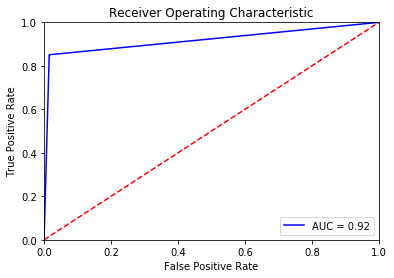

In [27]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred )
roc_auc = metrics.auc(fpr, tpr)

plt.title('Random Forest Classifier ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [17]:
#train using a multinomial naive bayes classifier
list_alpha = np.arange(1/100000, 20, 0.11) #train using different reguralisation parameter
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [18]:
#shows first 5 learning models
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head()

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.968799,0.926653,0.938307,0.890518
1,0.11001,0.963255,0.935158,0.950910,0.898492
2,0.22001,0.960153,0.934905,0.951113,0.897822
3,0.33001,0.957865,0.934653,0.951824,0.896773
4,0.44001,0.955816,0.934611,0.952942,0.895853


In [19]:
best_index = models['Test Precision'].idxmax() #select model based on best precision
models.iloc[best_index, :]

alpha             0.110010
Train Accuracy    0.963255
Test Accuracy     0.935158
Test Recall       0.950910
Test Precision    0.898492
Name: 1, dtype: float64

In [20]:
#finding the confusion matrix
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted User', 'Predicted Trump'],index = ['Actual User', 'Actual Trump'])

,Predicted 0,Predicted 1
Actual 0,11231,2680
Actual 1,270,9569


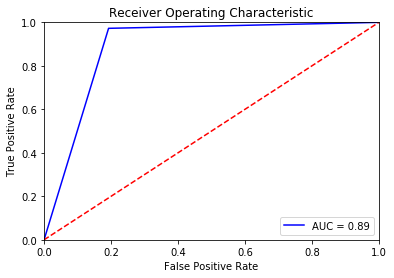

In [26]:
fpr, tpr, threshold = metrics.roc_curve(y_test, bayes.predict(X_test))
roc_auc = metrics.auc(fpr, tpr)

plt.title('Multinomial Naive Bayes ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [21]:
#train using support vector classifier
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

In [22]:
#shows first 5 learning models
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head()

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.930356,0.925432,0.843988,0.972365
1,600.0,0.933486,0.928084,0.850493,0.972458
2,700.0,0.937205,0.930695,0.858319,0.971024
3,800.0,0.941781,0.933516,0.865535,0.970816
4,900.0,0.942988,0.938189,0.878341,0.969595


In [23]:
#select the best model
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 600.000000
Train Accuracy      0.933486
Test Accuracy       0.928084
Test Recall         0.850493
Test Precision      0.972458
Name: 1, dtype: float64

In [24]:
#find the confusion matrix
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted User', 'Predicted Trump'],index = ['Actual User', 'Actual Trump'])

,Predicted 0,Predicted 1
Actual 0,13615,296
Actual 1,1015,8824


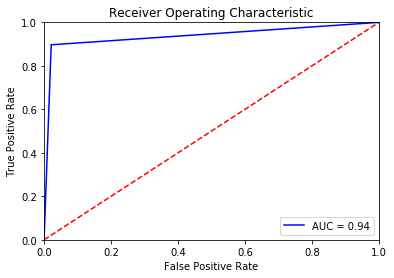

In [25]:
fpr, tpr, threshold = metrics.roc_curve(y_test,  svc.predict(X_test))
roc_auc = metrics.auc(fpr, tpr)

plt.title('Support Vector Classifier ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [56]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english',max_features = 30000)
X = f.fit_transform(tweets["text"])
np.shape(X) #added 30000 new features

(94998, 30000)

In [57]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(71248, 30000), (23750, 30000)]


In [58]:
#train using random forest
forest2 = RandomForestClassifier(n_estimators = 501, criterion = 'entropy')                               
forest2.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
# Predicting the Test set results 
y_pred = forest2.predict(X_test) 
  
y_pred 

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred)
print('Test Precision: %f' % precision)
recall = recall_score(y_test, y_pred)
print('Test Recall: %f' % recall)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Test Accuracy: 0.931958
Test Precision: 0.947242
Test Recall: 0.885049
F1 score: 0.915090


In [61]:
# Making the Confusion Matrix   
cm = confusion_matrix(y_test, y_pred) 
pd.DataFrame(data = cm, columns = ['Predicted User', 'Predicted Trump'],index = ['Actual User', 'Actual Trump'])

,Predicted User,Predicted Trump
Actual User,13426,485
Actual Trump,1131,8708


Text(0.5, 0, 'False Positive Rate')

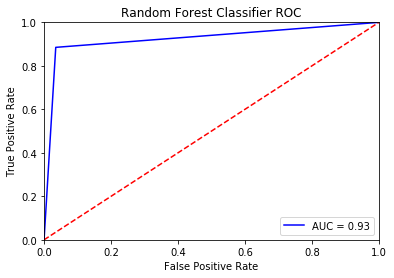

In [74]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred )
roc_auc = metrics.auc(fpr, tpr)

plt.title('Random Forest Classifier ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [63]:
#train using a multinomial naive bayes classifier
list_alpha = np.arange(1/100000, 20, 0.11) #train using different reguralisation parameter
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes2 = naive_bayes.MultinomialNB(alpha=alpha)
    bayes2.fit(X_train, y_train)
    score_train[count] = bayes2.score(X_train, y_train)
    score_test[count]= bayes2.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes2.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes2.predict(X_test))
    count = count + 1 

In [64]:
#shows first 5 learning models
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head()

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.954441,0.926147,0.941051,0.887472
1,0.11001,0.951128,0.934947,0.953755,0.895933
2,0.22001,0.949051,0.935032,0.954772,0.895349
3,0.33001,0.947718,0.934821,0.954162,0.895374
4,0.44001,0.946455,0.934442,0.954060,0.894682


In [65]:
best_index = models['Test Precision'].idxmax() #select model based on best precision
models.iloc[best_index, :]

alpha             0.110010
Train Accuracy    0.951128
Test Accuracy     0.934947
Test Recall       0.953755
Test Precision    0.895933
Name: 1, dtype: float64

In [66]:
#finding the confusion matrix
m_confusion_test = metrics.confusion_matrix(y_test, bayes2.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted User', 'Predicted Trump'],index = ['Actual User', 'Actual Trump'])

,Predicted User,Predicted Trump
Actual User,11737,2174
Actual Trump,348,9491


Text(0.5, 0, 'False Positive Rate')

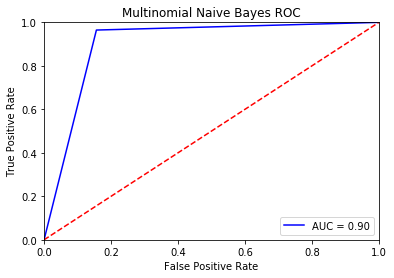

In [73]:
fpr, tpr, threshold = metrics.roc_curve(y_test, bayes2.predict(X_test))
roc_auc = metrics.auc(fpr, tpr)

plt.title('Multinomial Naive Bayes ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [68]:
#train using support vector classifier
list_C = np.arange(500, 2000, 100) #100000 different possibilities 
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc2 = svm.SVC(C=C)
    svc2.fit(X_train, y_train)
    score_train[count] = svc2.score(X_train, y_train)
    score_test[count]= svc2.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc2.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc2.predict(X_test))
    count = count + 1 

In [69]:
#shows first 5 learning models
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head()

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.947283,0.941768,0.889013,0.967803
1,600.0,0.950104,0.943158,0.892977,0.967302
2,700.0,0.952293,0.944379,0.896636,0.966689
3,800.0,0.954020,0.944926,0.898364,0.966328
4,900.0,0.955620,0.945726,0.900803,0.965889


In [70]:
#select the best model
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      0.947283
Test Accuracy       0.941768
Test Recall         0.889013
Test Precision      0.967803
Name: 0, dtype: float64

In [71]:
#find the confusion matrix
m_confusion_test = metrics.confusion_matrix(y_test, svc2.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted User', 'Predicted Trump'],index = ['Actual User', 'Actual Trump'])

,Predicted User,Predicted Trump
Actual User,13577,334
Actual Trump,843,8996


Text(0.5, 0, 'False Positive Rate')

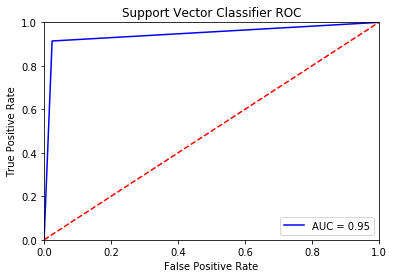

In [72]:
fpr, tpr, threshold = metrics.roc_curve(y_test,  svc2.predict(X_test))
roc_auc = metrics.auc(fpr, tpr)

plt.title('Support Vector Classifier ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')